# Artifact Removal 
Various types of artifacts were found on breast mammogram images, as shown below.

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from bcd.utils.image import convert_uint8

In [2]:
img1 = "data/image/2_exp/train/benign/2a44122c-f831-4220-95a8-408bcafcf2ce.png"
img2 = "data/image/2_exp/train/benign/3f72309d-7cd9-4e30-ae81-073adb541bcd.png"
img3 = "data/image/2_exp/train/benign/97556037-b959-4395-830b-380dcac2d58e.png"
img4 = "data/image/2_exp/train/malignant/6cdf46d8-596b-47ab-a428-c8769733c93c.png"


In [3]:
img1 = cv2.imread(img1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(img2, cv2.IMREAD_GRAYSCALE)
img3 = cv2.imread(img3, cv2.IMREAD_GRAYSCALE)
img4 = cv2.imread(img4, cv2.IMREAD_GRAYSCALE)

In [4]:
img1 = convert_uint8(img1)
img2 = convert_uint8(img2)
img3 = convert_uint8(img3)
img4 = convert_uint8(img4)

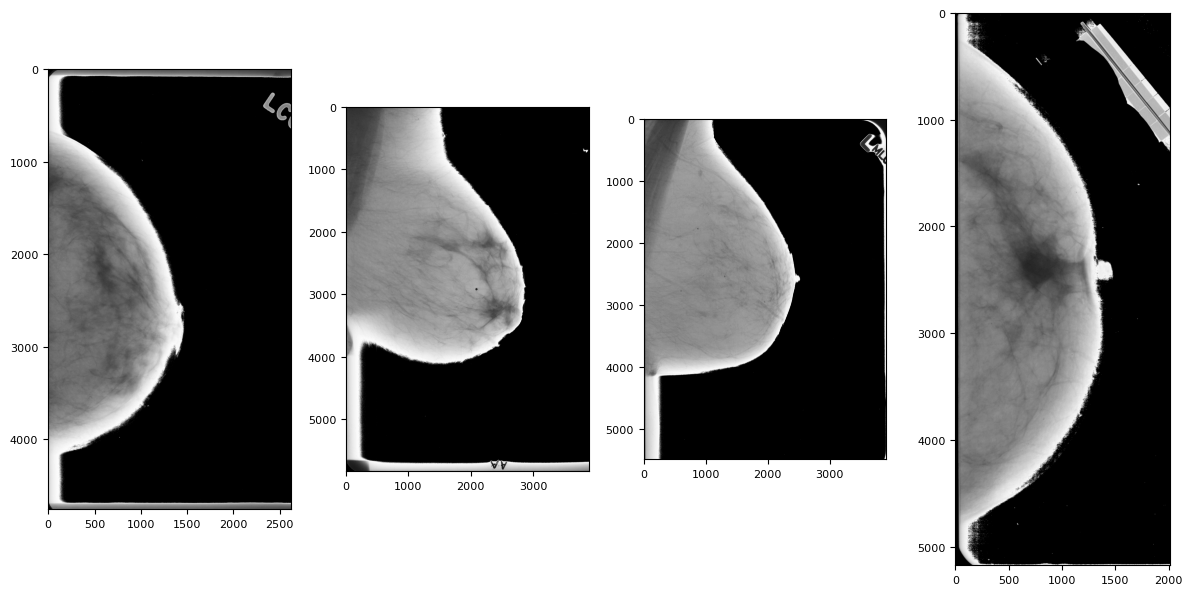

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12,6))
_ = axes[0].imshow(img1, cmap='gray', aspect='auto')
_ = axes[1].imshow(img2, cmap='gray',aspect='auto')
_ = axes[2].imshow(img3, cmap='gray',aspect='auto')
_ = axes[3].imshow(img4, cmap='gray',aspect='auto')
plt.tight_layout()
plt.show()
